# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [31]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [32]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(cities)

['korla', 'bolivar', 'upernavik', 'cabo san lucas', 'hambantota', 'jamestown', 'salalah', 'amderma', 'alyangula', 'albany', 'hobart', 'batagay-alyta', 'mizan teferi', 'dikson', 'esperance', 'chokurdakh', 'san carlos de bariloche', 'port alfred', 'harper', 'katsuura', 'ushuaia', 'mataura', 'bethel', 'hermanus', 'kodiak', 'kavaratti', 'la ronge', 'castro', 'avarua', 'hilo', 'bredasdorp', 'yurty', 'jijiga', 'yar-sale', 'fussen', 'kapaa', 'vaini', 'batouri', 'hihifo', 'havre-saint-pierre', 'kamenskoye', 'opobo', 'malwan', 'seymchan', 'port elizabeth', 'caramay', 'ternate', 'punta arenas', 'te anau', 'pundaguitan', 'tiksi', 'smithers', 'flinders', 'yilan', 'mar del plata', 'saint-philippe', 'anadyr', 'new norfolk', 'camopi', 'lagoa', 'ballina', 'shalinskoye', 'ambovombe', 'caravelas', 'morgan city', 'porto novo', 'pisco', 'souillac', 'severo-yeniseyskiy', 'arraial do cabo', 'torbay', 'longyearbyen', 'puerto ayora', 'saldanha', 'karratha', 'belushya guba', 'thanyaburi', 'soe', 'bolungarvik',

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [33]:
url= " http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" +api_key
city_url= url+"&q="+"New York"
response = requests.get(city_url).json()
print(response)

{'coord': {'lon': -74.01, 'lat': 40.71}, 'weather': [{'id': 300, 'main': 'Drizzle', 'description': 'light intensity drizzle', 'icon': '09n'}], 'base': 'stations', 'main': {'temp': 40.93, 'feels_like': 32.29, 'temp_min': 37.99, 'temp_max': 43, 'pressure': 1020, 'humidity': 60}, 'visibility': 16093, 'wind': {'speed': 8.05, 'deg': 200}, 'clouds': {'all': 90}, 'dt': 1581559184, 'sys': {'type': 1, 'id': 4686, 'country': 'US', 'sunrise': 1581508474, 'sunset': 1581546370}, 'timezone': -18000, 'id': 5128581, 'name': 'New York City', 'cod': 200}


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [35]:
data= [] 
cities = response
i= 0
for city in cities:
    response = requests.get(url + city + "&appid=" + api_key)
    print(response)
    print(city)
    i = i+1
    try:
        temp= response["main"]["temp_max"]
        humditiy= response["main"]["humidity"]
        speed= response["wind"]["speed"]
        cloudiness= response ["clouds"]["all"]
        latitude= response["coord"]["lat"]
        longitude= response["coord"]["lon"]
        country= response["sys"]["country"]
        date= response["dt"]
        data.append([city, cloudiness, country, date, humidity, latitude, longitude, temp, speed])
        print(f"counter{i} || {city}")
        time.sleep(1)
    except:
        print("citynotfound")

<Response [401]>
cod
citynotfound
<Response [401]>
message
citynotfound


In [16]:
data_df= pd.DataFrame(data,columns=["City", "Cloudiness","Country","Date", "Humidity", "Lat", "Lng", "Max Temp", "Wind Speed"])

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [17]:
date=time.strftime("%d%m%y")

#### Latitude vs. Temperature Plot

Text(0.5, 1.0, 'City Latitude vs. Max Temperature110220')

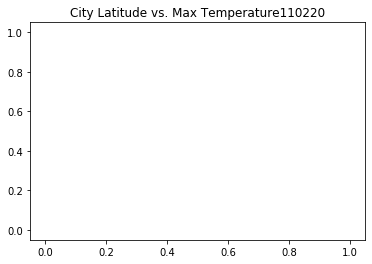

In [18]:
plt.scatter(data_df["Lat"],data_df["Max Temp"], c="lightblue", edgecolor="black")
plt.title(f"City Latitude vs. Max Temperature{date}")

#### Latitude vs. Humidity Plot

Text(0.5, 1.0, 'City Latitude vs. Humidity110220')

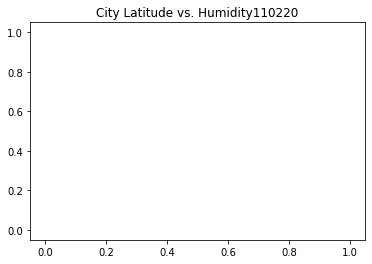

In [19]:
plt.scatter(data_df["Lat"],data_df["Humidity"], c="lightblue", edgecolor="black")
plt.title(f"City Latitude vs. Humidity{date}")

#### Latitude vs. Cloudiness Plot

Text(0.5, 1.0, 'City Latitude vs. Cloudiness110220')

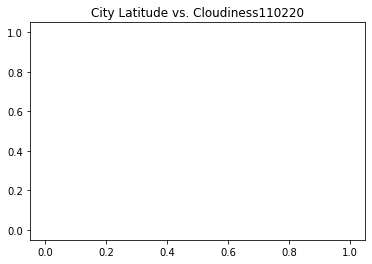

In [20]:
plt.scatter(data_df["Lat"],data_df["Cloudiness"], c="lightblue", edgecolor="black")
plt.title(f"City Latitude vs. Cloudiness{date}")

#### Latitude vs. Wind Speed Plot

Text(0.5, 1.0, 'City Latitude vs. Wind Speed110220')

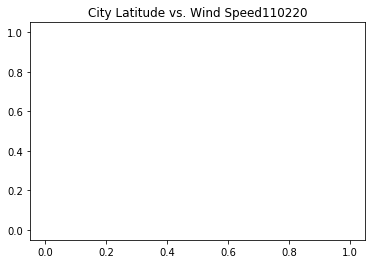

In [21]:
plt.scatter(data_df["Lat"],data_df["Wind Speed"], c="lightblue", edgecolor="black")
plt.title(f"City Latitude vs. Wind Speed{date}")